<a href="https://colab.research.google.com/github/sandyweng/Lung_Cancer_Deep_Learning/blob/main/Aca_vs_SCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\ Drive/Binary.zip > /dev/null

In [ ]:
from keras import models
from keras import layers
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import tensorflow as tf

In [ ]:
conv_base = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet", input_shape=(150,150,3)
)

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
train_dir = '/content/Binary/train'
validation_dir = '/content/Binary/validation'
test_dir = '/content/Binary/test'

In [ ]:
import numpy as np

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 6400)

Found 6400 images belonging to 2 classes.


In [ ]:
validation_features, validation_labels = extract_features(validation_dir, 1600)
test_features, test_labels = extract_features(test_dir, 2000)

Found 1600 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
train_features = np.reshape(train_features, (6400, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1600, 4 * 4 * 512))
test_features = np.reshape(test_features, (2000, 4 * 4 * 512))

In [ ]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
320/320 [==============================] - 16s 6ms/step - loss: 0.3205 - acc: 0.8575 - val_loss: 0.1748 - val_acc: 0.9294
Epoch 2/30
320/320 [==============================] - 2s 5ms/step - loss: 0.1609 - acc: 0.9391 - val_loss: 0.1333 - val_acc: 0.9494
Epoch 3/30
320/320 [==============================] - 2s 5ms/step - loss: 0.1380 - acc: 0.9466 - val_loss: 0.1342 - val_acc: 0.9500
Epoch 4/30
320/320 [==============================] - 2s 5ms/step - loss: 0.1140 - acc: 0.9541 - val_loss: 0.1089 - val_acc: 0.9606
Epoch 5/30
320/320 [==============================] - 1s 4ms/step - loss: 0.1033 - acc: 0.9619 - val_loss: 0.1035 - val_acc: 0.9606
Epoch 6/30
320/320 [==============================] - 2s 5ms/step - loss: 0.0915 - acc: 0.9651 - val_loss: 0.1039 - val_acc: 0.9594
Epoch 7/30
320/320 [==============================] - 1s 4ms/step - loss: 0.0869 - acc: 0.9669 - val_loss: 0.0927 - val_acc: 0.9694
Epoch 8/30
320/320 [==============================] - 2s 5ms/step - loss: 0

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:

conv_base.trainable = False

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=50,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=20,
      verbose=1)

Found 6400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Epoch 1/20
50/50 [==============================] - 28s 550ms/step - loss: 0.2036 - acc: 0.9174 - val_loss: 0.1488 - val_acc: 0.9450
Epoch 2/20
50/50 [==============================] - 27s 536ms/step - loss: 0.2254 - acc: 0.9117 - val_loss: 0.1579 - val_acc: 0.9460
Epoch 3/20
50/50 [==============================] - 27s 540ms/step - loss: 0.1829 - acc: 0.9269 - val_loss: 0.1936 - val_acc: 0.9270
Epoch 4/20
50/50 [==============================] - 27s 542ms/step - loss: 0.1822 - acc: 0.9197 - val_loss: 0.1706 - val_acc: 0.9330
Epoch 5/20
50/50 [==============================] - 26s 532ms/step - loss: 0.2165 - acc: 0.9131 - val_loss: 0.1477 - val_acc: 0.9510
Epoch 6/20
50/50 [==============================] - 27s 534ms/step - loss: 0.1699 - acc: 0.9282 - val_loss: 0.1457 - val_acc: 0.9470
Epoch 7/20
50/50 [==============================] - 27s 541ms/step - loss: 0.1692 - acc: 0.9340 - val_loss: 0.1380 - v

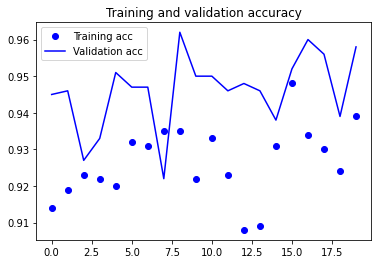

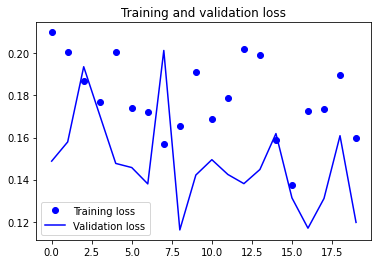

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=50,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=20)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
50/50 [==============================] - 24s 425ms/step - loss: 0.1515 - acc: 0.9366 - val_loss: 0.0978 - val_acc: 0.9675
Epoch 2/20
50/50 [==============================] - 21s 424ms/step - loss: 0.2271 - acc: 0.9153 - val_loss: 0.0830 - val_acc: 0.9725
Epoch 3/20
50/50 [==============================] - 21s 429ms/step - loss: 0.1563 - acc: 0.9419 - val_loss: 0.1737 - val_acc: 0.9425
Epoch 4/20
50/50 [==============================] - 21s 421ms/step - loss: 0.1444 - acc: 0.9531 - val_loss: 0.1009 - val_acc: 0.9575
Epoch 5/20
50/50 [==============================] - 21s 427ms/step - loss: 0.1391 - acc: 0.9338 - val_loss: 0.1188 - val_acc: 0.9625
Epoch 6/20
50/50 [==============================] - 21s 430ms/step - loss: 0.1220 - acc: 0.9529 - val_loss: 0.1517 - val_acc: 0.9450
Epoch 7/20
50/50 [==============================] - 34s 681ms/step - loss: 0.1479 - acc: 0.9381 - val_loss: 0.0729 - val_acc: 0.9725
Epoch 8/20
50/50 [==============================] - 21s 418ms/step - 

In [ ]:

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 2000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test acc: 0.9599999785423279


In [ ]:
import cv2
scc = cv2.imread('/content/Binary/test/lung_scc/lungscc4650.jpeg')
scc= cv2.resize(scc, (150,150))
scc= np.reshape(scc, [1,150,150,3])

In [ ]:
np.argmax(model.predict(scc), axis=-1)

array([0])

In [ ]:
aca = cv2.imread('/content/Binary/test/lung_aca/lungaca4500.jpeg')
aca= cv2.resize(aca, (150,150))
aca= np.reshape(aca, [1,150,150,3])
np.argmax(model.predict(aca), axis=-1)

array([0])

In [ ]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(validation_generator, test_generator.samples / test_generator.batch_size)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

Confusion Matrix
[[800   0]
 [800   0]]


SyntaxError: ignored